Silent Cities Dataset - Audio Tagging Demonstration
--

This notebook reads the output pandas pickled data from a folder processed using the "tag_silentcity.py" and plots a heat map of detected categories.

In [2]:
import pandas as pd
import numpy as np
from audioset_tagging_cnn.config import labels
import datetime
from matplotlib import pyplot as plt 

Read dataframe

In [3]:
Df = pd.read_pickle('audiomoth2days.xz')

Gather the probas and find the categories for which the maximum through the night is more than a certain proba threshold

In [4]:
allprobas = np.stack(Df['probas'])

In [5]:
def keep_array_thresh(probasarray,threshold=0.1):
    array_max = np.max(probasarray,axis=0)
    ind_max = np.argwhere(array_max>threshold)

    return ind_max

In [6]:
ind_labels =keep_array_thresh(allprobas,threshold = 0.1)
kept_labels = [labels[int(i)] for i in ind_labels]

Theses are the labels that have a probability of more than 10% at least once in all the recordings

In [7]:
kept_labels

['Speech',
 'Applause',
 'Crowd',
 'Animal',
 'Bird',
 'Bird vocalization, bird call, bird song',
 'Crow',
 'Caw',
 'Insect',
 'Music',
 'Wind',
 'Ocean',
 'Waves, surf',
 'Vehicle',
 'Boat, Water vehicle',
 'Motor vehicle (road)',
 'Car',
 'Skidding',
 'Tire squeal',
 'Car passing by',
 'Race car, auto racing',
 'Truck',
 'Air brake',
 'Reversing beeps',
 'Bus',
 'Emergency vehicle',
 'Police car (siren)',
 'Ambulance (siren)',
 'Fire engine, fire truck (siren)',
 'Motorcycle',
 'Traffic noise, roadway noise',
 'Rail transport',
 'Train',
 'Railroad car, train wagon',
 'Train wheels squealing',
 'Subway, metro, underground',
 'Aircraft',
 'Aircraft engine',
 'Fixed-wing aircraft, airplane',
 'Engine',
 'Light engine (high frequency)',
 'Lawn mower',
 'Accelerating, revving, vroom',
 'Siren',
 'Fireworks',
 'Clickety-clack',
 'Outside, urban or manmade',
 'Environmental noise',
 'Pink noise',
 'Field recording']

Now manually filter this list to visualize only a few of them 

In [17]:
subset = [0,4,9,13,18,26,27,28]
print([kept_labels[categ] for categ in subset])

['Speech', 'Bird', 'Music', 'Vehicle', 'Tire squeal', 'Police car (siren)', 'Ambulance (siren)', 'Fire engine, fire truck (siren)']


In [18]:
ind_labels_final = [ind_labels[categ] for categ in subset]
kept_labels_final = [kept_labels[categ] for categ in subset]

In [19]:
allprobas_kept = allprobas[:,ind_labels_final].squeeze()

Finally prepare a simple visualisation.

<Figure size 1440x720 with 0 Axes>

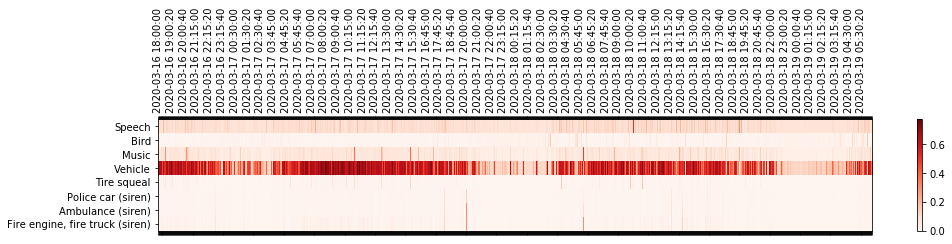

In [20]:
skiptime = 26 ### this is necessary to annotate the x axis, change this value to print more or less date / time labels

timelabels = [''] * len(Df.datetime)

origtimes = list(Df.datetime)

for i in np.arange(0,len(origtimes),skiptime):
    timelabels[i] = origtimes[i]
    

plt.figure(figsize=(20,10))
plt.matshow(allprobas_kept.T,vmin=0,aspect='auto',cmap=plt.cm.Reds)
plt.yticks(ticks = range(len(kept_labels_final)),labels=kept_labels_final)
plt.xticks(ticks = range(len(timelabels)),labels = timelabels,rotation=90)
plt.colorbar()
plt.savefig('silentcity.png',dpi=300,bbox_inches='tight')

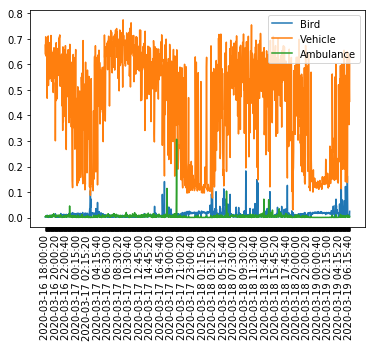

In [30]:
skiptime = 50 ### this is necessary to annotate the x axis, change this value to print more or less date / time labels

timelabels = [''] * len(Df.datetime)

origtimes = list(Df.datetime)

for i in np.arange(0,len(origtimes),skiptime):
    timelabels[i] = origtimes[i]
    
    

plt.plot(allprobas_kept[:,1])
plt.plot(allprobas_kept[:,3])
plt.plot(allprobas_kept[:,6])
plt.xticks(ticks = range(len(timelabels)),labels = timelabels,rotation=90)
plt.legend(['Bird','Vehicle','Ambulance'])
plt.savefig('silentcity2.png',dpi=300,bbox_inches='tight')
plt.show()